In [18]:
import torch
from torchvision import transforms
from torchvision import datasets
import matplotlib.pyplot as plt

## Transformation

In [2]:
data_path = 'data/ch7/'
cifar10 = datasets.CIFAR10(data_path, train=True, download=True)
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True)

100%|██████████| 170M/170M [00:38<00:00, 4.40MB/s] 


In [3]:
type(cifar10_val).__mro__

(torchvision.datasets.cifar.CIFAR10,
 torchvision.datasets.vision.VisionDataset,
 torch.utils.data.dataset.Dataset,
 typing.Generic,
 object)

In [4]:
len(cifar10)

50000

In [6]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

img, label = cifar10[99]

In [7]:
img, label, class_names[label]

(<PIL.Image.Image image mode=RGB size=32x32>, 1, 'automobile')

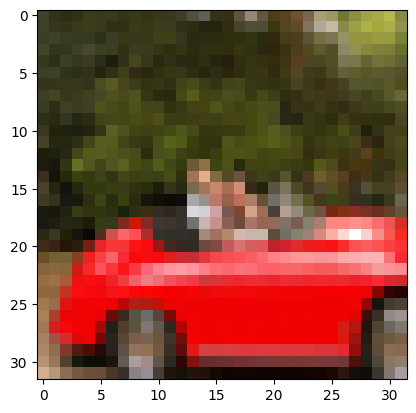

In [9]:
plt.imshow(img)

In [11]:
dir(transforms)

['AugMix',
 'AutoAugment',
 'AutoAugmentPolicy',
 'CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'ElasticTransform',
 'FiveCrop',
 'GaussianBlur',
 'Grayscale',
 'InterpolationMode',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandAugment',
 'RandomAdjustSharpness',
 'RandomAffine',
 'RandomApply',
 'RandomAutocontrast',
 'RandomChoice',
 'RandomCrop',
 'RandomEqualize',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomInvert',
 'RandomOrder',
 'RandomPerspective',
 'RandomPosterize',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSolarize',
 'RandomVerticalFlip',
 'Resize',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 'TrivialAugmentWide',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional_pil',
 '_functional_tensor',
 '_presets',
 'autoaugment',
 'functional',
 'transforms']

In [12]:
to_tensor = transforms.ToTensor()
img_t = to_tensor(img)
img_t.shape

torch.Size([3, 32, 32])

In [14]:
# We can pass transform directly to the dataset
tensor_cifar10 = datasets.CIFAR10(data_path, train=True, download=False, transform=transforms.ToTensor())
img_t, _ = tensor_cifar10[99]
type(img_t)

torch.Tensor

In [15]:
img_t.shape, img_t.dtype

(torch.Size([3, 32, 32]), torch.float32)

In [16]:
# ToTensor() also scales value to between 0 and 1
img_t.min(), img_t.max()

(tensor(0.), tensor(1.))

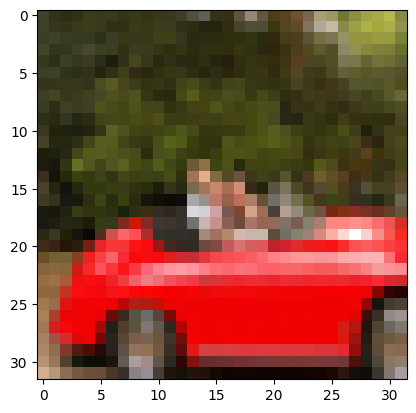

In [17]:
plt.imshow(img_t.permute(1, 2, 0))

In [19]:
imgs = torch.stack([img_t for img_t, _ in tensor_cifar10], dim=3)
imgs.shape

torch.Size([3, 32, 32, 50000])

In [21]:
# Calculate mean and std across all channels
mean = imgs.view(3, -1).mean(dim=1)
std = imgs.view(3, -1).std(dim=1)

In [22]:
tensor_cifar10 = datasets.CIFAR10(
    data_path, train=True, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ])
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9802377..2.1267893].


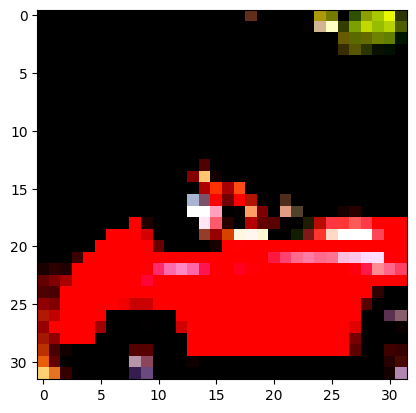

In [23]:
img_t, _ = tensor_cifar10[99]
plt.imshow(img_t.permute(1, 2, 0))

## Cifar2

In [121]:
import torch.nn as nn

In [124]:
cifar10 = datasets.CIFAR10(
    data_path, train=True, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ])
)

cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ])
)

In [125]:
label_map = {0: 0, 2: 1}
class_names = ['airplane', 'bird']
cifar2 = [(img, label_map[label]) for img, label in cifar10 if label in [0, 2]]
cifar2_val = [(img, label_map[label]) for img, label in cifar10_val if label in [0, 2]]

In [ ]:
# Define model
n_out = 2       # Number of classification classes
seq_model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(),
    nn.Linear(512, n_out)
)

In [38]:
def softmax(t):
    return torch.exp(t) / torch.exp(t).sum()

x = torch.tensor([1.0, 2.0, 3.0])
softmax(x)

tensor([0.0900, 0.2447, 0.6652])

In [39]:
softmax(x).sum()

tensor(1.)

In [40]:
softmax = nn.Softmax(dim=1)
x = torch.tensor([[1.0, 2.0, 3.0], [1.0, 2.0, 3.0]])
softmax(x)

tensor([[0.0900, 0.2447, 0.6652],
        [0.0900, 0.2447, 0.6652]])

In [41]:
sm_model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(),
    nn.Linear(512, 2),
    nn.Softmax(dim=1)
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8622148..2.0301533].


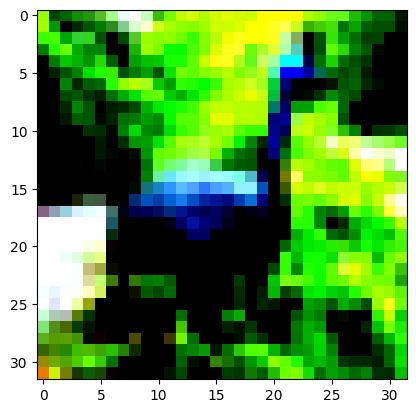

In [43]:
img, _ = cifar2[0]
plt.imshow(img.permute(1, 2, 0))
plt.show()

In [45]:
img_batch = img.view(-1).unsqueeze(0)
out = sm_model(img_batch)
out.detach().numpy()

array([[0.5156103 , 0.48438972]], dtype=float32)

In [47]:
_, max_index = out.max(dim=1)
max_index

tensor([0])

In [48]:
log_sm_model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(),
    nn.Linear(512, 2),
    nn.LogSoftmax(dim=1)
)

In [49]:
nll_loss = nn.NLLLoss()     # Takes in output for one sample and class indices

In [50]:
img, label = cifar2[0]
out = log_sm_model(img.view(-1).unsqueeze(0))
nll_loss(out, torch.tensor([label]))

tensor(0.5246, grad_fn=<NllLossBackward0>)

## Training

In [133]:
import torch
import torch.nn as nn
import torch.optim as optim

from tqdm import tqdm

In [127]:
log_model = nn.Sequential(
    nn.Linear(3072, 256),
    nn.Tanh(),
    nn.Linear(256, 2),
    nn.LogSoftmax(dim=1)
)
log_model = log_model.to('cuda')

In [134]:
learning_rate = 1e-2
optimizer_sgd = optim.SGD(log_model.parameters(), learning_rate)
nll_loss = nn.NLLLoss()

In [135]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=False)

In [211]:
n_epochs = 100
def train(epochs, model, loss, optimizer, loader):
    for _ in tqdm(range(epochs), position=0, leave=True):
        for images, labels in loader:
            batch_count = images.shape[0]
            images = images.to('cuda')
            labels = labels.to('cuda')
            outputs = model(images.view(batch_count, -1))
            train_loss = loss(outputs, labels)

            optimizer.zero_grad()
            train_loss.backward()
            optimizer.step()

def evaluate(model, loader):
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in loader:
            batch_size = images.shape[0]
            images = images.to('cuda')
            labels = labels.to('cuda')

            outputs = model(images.view(batch_size, -1))      # For each sample, the output contains 1 element per class (2 classes)

            _, predicted = torch.max(outputs, dim=1)   # Get the predicted class (output with maximum value)

            correct_batch = (predicted == labels)
            correct += int(correct_batch.sum())
            total += labels.shape[0]

    print(f'Accuracy: {correct / total}')

In [140]:
train(n_epochs, log_model, nll_loss, optimizer_sgd, train_loader)
evaluate(log_model, val_loader)

100%|██████████| 100/100 [00:19<00:00,  5.16it/s]

Accuracy: 0.819


In [143]:
# New model
taper_model = nn.Sequential(
    nn.Linear(3072, 1024),
    nn.Tanh(),
    nn.Linear(1024, 512),
    nn.Tanh(),
    nn.Linear(512, 128),
    nn.Tanh(),
    nn.Linear(128, 2),
    nn.LogSoftmax(dim=1)
)
taper_model = taper_model.to('cuda')

In [144]:
optimizer_taper = optim.SGD(taper_model.parameters(), learning_rate)
train(n_epochs, taper_model, nll_loss, optimizer_taper, train_loader)
evaluate(taper_model, val_loader)

100%|██████████| 100/100 [00:27<00:00,  3.65it/s]

Accuracy: 0.8145


In [151]:
# LogSoftmax + NLL is mathematically equivalent to CrossEntropyLoss on the direct outputs of the model with no LogSoftmax
# This is more convenient, as the loss numbers are exactly the same,
# but the output of the model is not interpreted as probabilities anymore
no_log_sm_model = nn.Sequential(
    nn.Linear(3072, 1024),
    nn.Tanh(),
    nn.Linear(1024, 512),
    nn.Tanh(),
    nn.Linear(512, 128),
    nn.Tanh(),
    nn.Linear(128, 2),
)
no_log_sm_model = no_log_sm_model.to('cuda')
ce_loss = nn.CrossEntropyLoss()

In [152]:
optimizer_no_log_sm = optim.SGD(no_log_sm_model.parameters(), learning_rate)
train(n_epochs, no_log_sm_model, ce_loss, optimizer_no_log_sm, train_loader)
evaluate(no_log_sm_model, val_loader)

100%|██████████| 100/100 [00:27<00:00,  3.60it/s]

Accuracy: 0.808


In [153]:
# The model is highly overfitting
evaluate(no_log_sm_model, train_loader)

Accuracy: 1.0


In [154]:
# Parameter count
numel_list = [p.numel() for p in no_log_sm_model.parameters() if p.requires_grad == True]
sum(numel_list), numel_list

(3737474, [3145728, 1024, 524288, 512, 65536, 128, 256, 2])

## Exercises

### Exercise 1

Use `torchvision` to implement random cropping of the data.

In [172]:
cifar10 = datasets.CIFAR10(
    data_path, train=True, download=False,
    transform=transforms.Compose([
        transforms.RandomCrop((17, 20)),
        transforms.ToTensor(),
    ])
)

In [195]:
cropped_image, _ = cifar10[400]
cropped_image.shape

torch.Size([3, 17, 20])

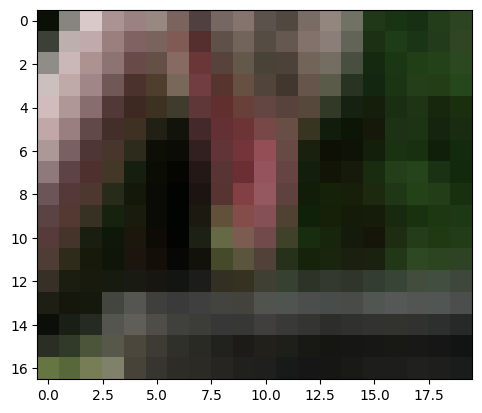

In [196]:
plt.imshow(cropped_image.permute(1, 2, 0))

a) The images are randomly cropped to fit the size specified in the size parameter of the class `RandomCrop`.

b) When requesting the image again, it randomly crops again.

In [197]:
cifar10 = datasets.CIFAR10(
    data_path, train=True, download=False,
    transform=transforms.Compose([
        transforms.RandomCrop((17, 20)),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ])
)

cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=False,
    transform=transforms.Compose([
        transforms.RandomCrop((17, 20)),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ])
)

In [227]:
label_map = {0: 0, 2: 1}
cifar2 = [(img, label_map[label]) for img, label in cifar10 if label in [0, 2]]
cifar2_val = [(img, label_map[label]) for img, label in cifar10_val if label in [0, 2]]

In [228]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=False)

In [229]:
no_log_sm_model = nn.Sequential(
    nn.Linear(1020, 512),
    nn.Tanh(),
    nn.Linear(512, 128),
    nn.Tanh(),
    nn.Linear(128, 2),
)
no_log_sm_model = no_log_sm_model.to('cuda')
ce_loss = nn.CrossEntropyLoss()

In [204]:
optimizer_no_log_sm = optim.SGD(no_log_sm_model.parameters(), learning_rate)
train(n_epochs, no_log_sm_model, ce_loss, optimizer_no_log_sm, train_loader)
evaluate(no_log_sm_model, val_loader)
evaluate(no_log_sm_model, train_loader)

100%|██████████| 100/100 [00:16<00:00,  5.98it/s]


Accuracy: 0.752
Accuracy: 0.9954


c) Both the validation and training accuracies drop. But the model is still highly overfitting.

### Exercise 2

Switch loss functions. I will use `BCEWithLogitsLoss`.

In [243]:
# Labels have to be float now
label_map = {0: 0.0, 2: 1.0}
cifar2 = [(img, label_map[label]) for img, label in cifar10 if label in [0, 2]]
cifar2_val = [(img, label_map[label]) for img, label in cifar10_val if label in [0, 2]]

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=False)

In [264]:
n_epochs = 100
def train_bce(epochs, model, loss, optimizer, loader):
    for _ in tqdm(range(epochs), position=0, leave=True):
        for images, labels in loader:
            batch_count = images.shape[0]
            images = images.to('cuda')
            labels = labels.to('cuda')
            outputs = model(images.view(batch_count, -1))
            train_loss = loss(outputs, labels.unsqueeze(1))

            optimizer.zero_grad()
            train_loss.backward()
            optimizer.step()

def evaluate_bce(model, loader):
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in loader:
            batch_size = images.shape[0]
            images = images.to('cuda')
            labels = labels.to('cuda')

            outputs = model(images.view(batch_size, -1))    # The outputs are direct logits

            # To get the class from logits, apply sigmoid
            probs = outputs.sigmoid()
            predicted = (probs >= 0.5).int()
            correct_batch = (predicted.view(-1) == labels)
            correct += int(correct_batch.sum())
            total += labels.shape[0]

    print(f'Accuracy: {correct / total}')

In [249]:
no_log_sm_model = nn.Sequential(
    nn.Linear(1020, 512),
    nn.Tanh(),
    nn.Linear(512, 128),
    nn.Tanh(),
    nn.Linear(128, 1),
)
no_log_sm_model = no_log_sm_model.to('cuda')
ce_loss = nn.BCEWithLogitsLoss()

In [250]:
optimizer_no_log_sm = optim.SGD(no_log_sm_model.parameters(), learning_rate)
train_bce(n_epochs, no_log_sm_model, ce_loss, optimizer_no_log_sm, train_loader)

100%|██████████| 100/100 [00:17<00:00,  5.76it/s]


In [265]:
evaluate_bce(no_log_sm_model, val_loader)
evaluate_bce(no_log_sm_model, train_loader)

670
2000
Accuracy: 0.335
4048
10000
Accuracy: 0.4048


a) The model's accuracy is quite a lot lower than before

### Exercise 3

In [268]:
label_map = {0: 0, 2: 1}
cifar2 = [(img, label_map[label]) for img, label in cifar10 if label in [0, 2]]
cifar2_val = [(img, label_map[label]) for img, label in cifar10_val if label in [0, 2]]

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=False)

In [281]:
no_log_sm_model = nn.Sequential(
    nn.Linear(1020, 2),
)
no_log_sm_model = no_log_sm_model.to('cuda')
ce_loss = nn.CrossEntropyLoss()

In [282]:
optimizer_no_log_sm = optim.SGD(no_log_sm_model.parameters(), learning_rate)
train(n_epochs, no_log_sm_model, ce_loss, optimizer_no_log_sm, train_loader)
evaluate(no_log_sm_model, val_loader)
evaluate(no_log_sm_model, train_loader)

100%|██████████| 100/100 [00:12<00:00,  8.21it/s]


Accuracy: 0.6015
Accuracy: 0.6233


c) The only configuration not overfitting seems to be having only a single layer with no activation function. The loss decreases drastically, however.